In [1]:
#Cleaning data although degree data is relatively clean with pandas 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.datasets as dta
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



In [2]:
#pulling initial employment info 
employment_file = ("Resources\Employment Info 2002-2018.xlsx")

unemploy_info = pd.read_excel(employment_file)
unemploy_info.head()

,State,County,Unemployment_rate_2002,Unemployment_rate_2003,Unemployment_rate_2004,Unemployment_rate_2005,Unemployment_rate_2006,Unemployment_rate_2007,Unemployment_rate_2008,Unemployment_rate_2009,Unemployment_rate_2010,Unemployment_rate_2011,Unemployment_rate_2012,Unemployment_rate_2013,Unemployment_rate_2014,Unemployment_rate_2015,Unemployment_rate_2016,Unemployment_rate_2017,Unemployment_rate_2018
0,US,United States,5.788149,5.9835,5.527962,5.112026,4.630434,4.622425,5.78865,9.251236,9.633887,8.951434,8.069576,7.374532,6.1674,5.282897,4.868823,4.354932,3.89528
1,OH,Ohio,5.800000,6.2000,6.300000,5.900000,5.400000,5.600000,6.60000,10.200000,10.300000,8.800000,7.400000,7.500000,5.8000,5.000000,5.000000,5.000000,4.50000
2,OH,Adams County,9.900000,10.0000,9.800000,8.500000,7.600000,7.700000,9.40000,14.600000,16.000000,14.300000,12.500000,12.700000,9.2000,7.900000,7.600000,7.200000,7.00000
3,OH,Allen County,6.600000,6.9000,6.800000,6.300000,6.100000,6.300000,7.50000,11.300000,10.700000,9.500000,7.700000,7.800000,5.8000,4.900000,5.000000,5.000000,4.50000
4,OH,Ashland County,6.400000,7.0000,7.300000,6.500000,5.500000,6.000000,7.60000,12.500000,11.900000,9.900000,8.000000,8.100000,6.0000,5.100000,5.100000,4.900000,4.60000


In [3]:
#renaming employment info columns 

unemploy_info = unemploy_info.rename(columns={
"Unemployment_rate_2002": "2002 Unemployment Percent",
"Unemployment_rate_2003": "2003 Unemployment Percent",
"Unemployment_rate_2004": "2004 Unemployment Percent",
"Unemployment_rate_2005": "2005 Unemployment Percent",
"Unemployment_rate_2006": "2006 Unemployment Percent",
"Unemployment_rate_2007": "2007 Unemployment Percent",
"Unemployment_rate_2008": "2008 Unemployment Percent",
"Unemployment_rate_2009": "2009 Unemployment Percent",
"Unemployment_rate_2010": "2010 Unemployment Percent",
"Unemployment_rate_2011": "2011 Unemployment Percent",
"Unemployment_rate_2012": "2012 Unemployment Percent",
"Unemployment_rate_2013": "2013 Unemployment Percent",
"Unemployment_rate_2014": "2014 Unemployment Percent",
"Unemployment_rate_2015": "2015 Unemployment Percent",
"Unemployment_rate_2016": "2016 Unemployment Percent",
"Unemployment_rate_2017": "2017 Unemployment Percent",
"Unemployment_rate_2018": "2018 Unemployment Percent"
})

unemploy_info.head()

,State,County,2002 Unemployment Percent,2003 Unemployment Percent,2004 Unemployment Percent,2005 Unemployment Percent,2006 Unemployment Percent,2007 Unemployment Percent,2008 Unemployment Percent,2009 Unemployment Percent,2010 Unemployment Percent,2011 Unemployment Percent,2012 Unemployment Percent,2013 Unemployment Percent,2014 Unemployment Percent,2015 Unemployment Percent,2016 Unemployment Percent,2017 Unemployment Percent,2018 Unemployment Percent
0,US,United States,5.788149,5.9835,5.527962,5.112026,4.630434,4.622425,5.78865,9.251236,9.633887,8.951434,8.069576,7.374532,6.1674,5.282897,4.868823,4.354932,3.89528
1,OH,Ohio,5.800000,6.2000,6.300000,5.900000,5.400000,5.600000,6.60000,10.200000,10.300000,8.800000,7.400000,7.500000,5.8000,5.000000,5.000000,5.000000,4.50000
2,OH,Adams County,9.900000,10.0000,9.800000,8.500000,7.600000,7.700000,9.40000,14.600000,16.000000,14.300000,12.500000,12.700000,9.2000,7.900000,7.600000,7.200000,7.00000
3,OH,Allen County,6.600000,6.9000,6.800000,6.300000,6.100000,6.300000,7.50000,11.300000,10.700000,9.500000,7.700000,7.800000,5.8000,4.900000,5.000000,5.000000,4.50000
4,OH,Ashland County,6.400000,7.0000,7.300000,6.500000,5.500000,6.000000,7.60000,12.500000,11.900000,9.900000,8.000000,8.100000,6.0000,5.100000,5.100000,4.900000,4.60000


In [4]:
#saving final unemployment info dataframe 

# unemploy_info.to_excel("Resources/FinalUnemploymentInfo.xlsx", index=False)

In [5]:
#file path for initial data frame 

file = "Resources/2002 - 2019 Ohio Poverty - Median Income by County - SAIPESNC_11SEP21_12_11_11_34.csv"
inc_pov_df = pd.read_csv(file)
inc_pov_df.head()

,Year,State,County ID,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,90% Confidence Interval (All Ages in Poverty Count),All Ages in Poverty Percent,...,Under Age 5 in Poverty Count UB 90%,90% Confidence Interval (Under Age 5 in Poverty Count),Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,90% Confidence Interval (Under Age 5 in Poverty Percent),Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,90% Confidence Interval (Median Household Income in Dollars)
0,2019,0,0,United States,"320,118,791","39,490,096","39,248,096","39,732,096","39,248,096 to 39,732,096",12.3,...,"3,509,524","3,405,854 to 3,509,524",18.2,17.9,18.5,17.9 to 18.5,65712,"$65,594","$65,830","$65,594 to $65,830"
1,2018,0,0,United States,"319,184,033","41,852,315","41,619,366","42,085,264","41,619,366 to 42,085,264",13.1,...,"3,802,546","3,714,862 to 3,802,546",19.5,19.3,19.7,19.3 to 19.7,61937,"$61,843","$62,031","$61,843 to $62,031"
2,2017,0,0,United States,"317,741,588","42,583,651","42,342,619","42,824,683","42,342,619 to 42,824,683",13.4,...,"3,985,293","3,880,645 to 3,985,293",20.2,19.9,20.5,19.9 to 20.5,60336,"$60,250","$60,422","$60,250 to $60,422"
3,2016,0,0,United States,"315,165,470","44,268,996","44,022,086","44,515,906","44,022,086 to 44,515,906",14.0,...,"4,205,501","4,108,397 to 4,205,501",21.3,21.1,21.5,21.1 to 21.5,57617,"$57,502","$57,732","$57,502 to $57,732"
4,2015,0,0,United States,"313,476,400","46,153,077","45,878,016","46,428,138","45,878,016 to 46,428,138",14.7,...,"4,499,317","4,397,105 to 4,499,317",22.8,22.5,23.1,22.5 to 23.1,55775,"$55,690","$55,860","$55,690 to $55,860"


In [6]:
# renaming columns 

inc_pov_df = inc_pov_df.rename(columns={"Year": "Year", "State / County Name": "State and County", "All Ages in Poverty Percent": "Poverty Percentage", "Median Household Income in Dollars": "Median Household Income"})
# inc_pov_df.head()

In [7]:
#Grabbing needed poverty rate columns 

new_inc = inc_pov_df[["Year", "State", "County ID", "State and County", "Poverty Percentage", "Median Household Income"]]
new_inc.head()


,Year,State,County ID,State and County,Poverty Percentage,Median Household Income
0,2019,0,0,United States,12.3,65712
1,2018,0,0,United States,13.1,61937
2,2017,0,0,United States,13.4,60336
3,2016,0,0,United States,14.0,57617
4,2015,0,0,United States,14.7,55775


In [8]:
#Removing state and county ID as they are not needed

drop_new_inc = new_inc.drop(columns=["State", "County ID"])


drop_new_inc


,Year,State and County,Poverty Percentage,Median Household Income
0,2019,United States,12.3,65712
1,2018,United States,13.1,61937
2,2017,United States,13.4,60336
3,2016,United States,14.0,57617
4,2015,United States,14.7,55775
...,...,...,...,...
1615,2006,Wyandot County,8.0,44482
1616,2005,Wyandot County,6.8,43113
1617,2004,Wyandot County,6.6,42428
1618,2003,Wyandot County,6.3,40819


In [9]:
#saving final employment rate / median income file 

# drop_new_inc.to_csv("Resources/FinalEmployment&Income.csv", index=False)

In [10]:
#file path for initial  degrees data frame 

file = "Resources/Degrees By Subject Clean.xlsx"

df = pd.read_excel(file)
df

C:\Users\benjy\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Sector,Institution,Discipline Area,Subject Field,Level of Degree or Certificate,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Community Colleges,Belmont Technical College,Arts & Humanities,Liberal and General Studies,Associate Degree,0,0,0,0,0,...,1,6,7,0,0,0,0,0,0,0
1,Community Colleges,Belmont Technical College,Business,Accounting,Associate Degree,8,16,8,14,14,...,10,8,11,0,0,0,0,0,0,0
2,Community Colleges,Belmont Technical College,Business,Accounting,Less than One-Year Award,0,0,0,0,0,...,2,0,6,0,0,0,0,0,0,0
3,Community Colleges,Belmont Technical College,Business,Accounting,One to less than Two-Year Award,2,2,2,0,3,...,0,0,0,0,0,0,0,0,0,0
4,Community Colleges,Belmont Technical College,Business,Administrative and Secretarial,Associate Degree,3,3,4,2,7,...,4,5,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20923,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Political Science,Bachelor's Degree,0,0,0,0,0,...,0,0,0,17,22,23,28,18,18,48
20924,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Sociology and Related Social Sciences,Bachelor's Degree,0,0,0,0,0,...,0,0,0,9,17,8,18,9,8,16
20925,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,History,Bachelor's Degree,0,0,0,0,0,...,0,0,0,15,18,8,18,13,14,20
20926,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,History,Master's Degree,0,0,0,0,0,...,0,0,0,8,8,7,10,8,10,14


In [11]:
#dropping subject field as it is not needed for analysis 

df = df.drop (columns=["Subject Field"])
df

,Sector,Institution,Discipline Area,Level of Degree or Certificate,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Community Colleges,Belmont Technical College,Arts & Humanities,Associate Degree,0,0,0,0,0,1,...,1,6,7,0,0,0,0,0,0,0
1,Community Colleges,Belmont Technical College,Business,Associate Degree,8,16,8,14,14,5,...,10,8,11,0,0,0,0,0,0,0
2,Community Colleges,Belmont Technical College,Business,Less than One-Year Award,0,0,0,0,0,1,...,2,0,6,0,0,0,0,0,0,0
3,Community Colleges,Belmont Technical College,Business,One to less than Two-Year Award,2,2,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,Community Colleges,Belmont Technical College,Business,Associate Degree,3,3,4,2,7,7,...,4,5,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20923,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,17,22,23,28,18,18,48
20924,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,9,17,8,18,9,8,16
20925,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,15,18,8,18,13,14,20
20926,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Master's Degree,0,0,0,0,0,0,...,0,0,0,8,8,7,10,8,10,14


In [12]:
#drop rows if entire row is zero 

df = df.dropna(how="all")
df.head()

,Sector,Institution,Discipline Area,Level of Degree or Certificate,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Community Colleges,Belmont Technical College,Arts & Humanities,Associate Degree,0,0,0,0,0,1,...,1,6,7,0,0,0,0,0,0,0
1,Community Colleges,Belmont Technical College,Business,Associate Degree,8,16,8,14,14,5,...,10,8,11,0,0,0,0,0,0,0
2,Community Colleges,Belmont Technical College,Business,Less than One-Year Award,0,0,0,0,0,1,...,2,0,6,0,0,0,0,0,0,0
3,Community Colleges,Belmont Technical College,Business,One to less than Two-Year Award,2,2,2,0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,Community Colleges,Belmont Technical College,Business,Associate Degree,3,3,4,2,7,7,...,4,5,7,0,0,0,0,0,0,0


In [13]:
#getting degree options to clean 

df["Level of Degree or Certificate"].value_counts()

Bachelor's Degree                               6400
Associate Degree                                5475
Master's Degree                                 2612
One to less than Two-Year Award                 1819
Less than One-Year Award                        1689
Doctoral Degree - Research|Scholarship           756
Post-Baccalaureate Certificate                   502
Technical Certificate                            437
Technical Short Term Certificate                 410
General Certificate                              261
General Short Term Certificate                   173
Post-Master's Certificate                        168
Doctoral Degree - Professional Practice          140
Two to less than Four-Year Award                  69
Doctoral Degree - Other                           13
First-professional certificate (post-degree)       4
Name: Level of Degree or Certificate, dtype: int64

In [14]:
#deleting rows that do not contain Bachelors or Masters
# df.columns

In [15]:
df.drop(df[df["Level of Degree or Certificate"] == "Associate Degree"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "One to less than Two-Year Award"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Less than One-Year Award"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Doctoral Degree - Research|Scholarship"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Post-Baccalaureate Certificate"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Technical Certificate"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Technical Short Term Certificate"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "General Certificate"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "General Short Term Certificate"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Post-Master's Certificate"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Doctoral Degree - Professional Practice"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Two to less than Four-Year Award"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "Doctoral Degree - Other"].index, inplace=True)
df.drop(df[df["Level of Degree or Certificate"] == "First-professional certificate (post-degree)"].index, inplace=True)

df.head()

,Sector,Institution,Discipline Area,Level of Degree or Certificate,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1923,Private Not-for-Profit,ALLEGHENY WESLEYAN COLLEGE,Arts & Humanities,Bachelor's Degree,6,13,6,6,4,6,...,3,5,6,0,0,0,0,0,0,0
1924,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1925,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,8,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1926,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1927,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#making sure I have degrees desired for analysis 
df["Level of Degree or Certificate"].value_counts()

Bachelor's Degree    6400
Master's Degree      2612
Name: Level of Degree or Certificate, dtype: int64

In [17]:
#Checking if there are errors in Discipline Area 

df["Discipline Area"].value_counts()

Arts & Humanities                2068
Social & Behavioral Sciences     1318
Education                        1297
Natural Science & Mathematics    1232
Business                         1168
Health                            899
Engineering                       531
Services                          345
Unclassified                       76
Law                                63
Trades and Repair Technicians      15
Name: Discipline Area, dtype: int64

Nothing to clean in discipline area 

In [18]:
#checking for variances in Institution name 

df["Institution"].value_counts()

Ohio State University                                 444
University of Cincinnati                              399
University of Akron                                   373
Bowling Green State University                        359
Ohio University                                       341
                                                     ... 
ASHLAND UNIVERSITY DWIGHT SCHAR COLLEGE OF NURSING      1
CHAMBERLAIN COLLEGE OF NURSING–COLUMBUS CAMPUS          1
University of Cincinnati, Raymond Walters               1
University of Cincinnati, Clermont                      1
HONDROS COLLEGE OF NURSING                              1
Name: Institution, Length: 144, dtype: int64

In [19]:
#replacing St Joseph institution name

df["Institution"].replace({"COLLEGE OF MOUNT ST. JOSEPH" : "COLLEGE OF MOUNT ST JOSEPH"})
df

,Sector,Institution,Discipline Area,Level of Degree or Certificate,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1923,Private Not-for-Profit,ALLEGHENY WESLEYAN COLLEGE,Arts & Humanities,Bachelor's Degree,6,13,6,6,4,6,...,3,5,6,0,0,0,0,0,0,0
1924,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1925,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,8,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1926,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1927,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20922,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
20923,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,17,22,23,28,18,18,48
20924,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,9,17,8,18,9,8,16
20925,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,15,18,8,18,13,14,20


In [20]:
df = df.reset_index(drop=True)
df.loc['Total']= df.sum()
df

,Sector,Institution,Discipline Area,Level of Degree or Certificate,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Private Not-for-Profit,ALLEGHENY WESLEYAN COLLEGE,Arts & Humanities,Bachelor's Degree,6,13,6,6,4,6,...,3,5,6,0,0,0,0,0,0,0
1,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,8,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9008,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,17,22,23,28,18,18,48
9009,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,9,17,8,18,9,8,16
9010,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,0,15,18,8,18,13,14,20
9011,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Master's Degree,0,0,0,0,0,0,...,0,0,0,8,8,7,10,8,10,14


In [21]:
#adding a "Total degrees" column that will sum the total degrees given from 2002 - 2018 

df["Total Degrees"] = df.sum(axis= 1)
df

,Sector,Institution,Discipline Area,Level of Degree or Certificate,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Total Degrees
0,Private Not-for-Profit,ALLEGHENY WESLEYAN COLLEGE,Arts & Humanities,Bachelor's Degree,6,13,6,6,4,6,...,5,6,0,0,0,0,0,0,0,60
1,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,19,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
2,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,8,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Private Not-for-Profit,ANTIOCH COLLEGE,Arts & Humanities,Bachelor's Degree,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9008,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,17,22,23,28,18,18,48,174
9009,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,9,17,8,18,9,8,16,85
9010,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Bachelor's Degree,0,0,0,0,0,0,...,0,0,15,18,8,18,13,14,20,106
9011,University Main Campuses,Youngstown State University,Social & Behavioral Sciences,Master's Degree,0,0,0,0,0,0,...,0,0,8,8,7,10,8,10,14,65


In [22]:
tot_deg = df.drop(columns=['Sector', 'Institution', 'Discipline Area', 'Level of Degree or Certificate', 'Total Degrees'])
tot_deg

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,6,13,6,6,4,6,5,3,5,6,0,0,0,0,0,0,0
1,19,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9008,0,0,0,0,0,0,0,0,0,0,17,22,23,28,18,18,48
9009,0,0,0,0,0,0,0,0,0,0,9,17,8,18,9,8,16
9010,0,0,0,0,0,0,0,0,0,0,15,18,8,18,13,14,20
9011,0,0,0,0,0,0,0,0,0,0,8,8,7,10,8,10,14


In [23]:
degs_yr = pd.DataFrame(tot_deg.iloc[9012, 0:17])
# degs_yr = degs_yr.T
degs_yr.head(20)

,Total
2002,70826
2003,73678
2004,76210
2005,77404
2006,79708
2007,79971
2008,80415
2009,81484
2010,83430
2011,86128


In [24]:
#saving final cleaned degree data 

# df.to_excel ("Resources/FinalDegreeData.xlsx" , index=False)


In [25]:
#pulling in final cleaned files 

file1 = ("Resources\FinalDegreeData.xlsx")

df1 = pd.read_excel(file1)
print(df1.nunique())




Sector                              4
Institution                       144
Discipline Area                    11
Level of Degree or Certificate      2
2002                              193
2003                              207
2004                              198
2005                              201
2006                              202
2007                              203
2008                              200
2009                              209
2010                              212
2011                              220
2012                              204
2013                              195
2014                              200
2015                              208
2016                              210
2017                              225
2018                              198
Total Degrees                     996
dtype: int64


In [26]:
file2 = ("Resources\FinalEmployment&Income.csv")

df2 = pd.read_csv(file2)
df2.head(20)

,Year,State and County,Poverty Percentage,Median Household Income
0,2002,United States,12.1,42409
1,2002,Ohio,10.2,42246
2,2002,Adams County,15.8,29588
3,2002,Allen County,10.8,37621
4,2002,Ashland County,8.6,39306
5,2002,Ashtabula County,12.1,35054
6,2002,Athens County,20.1,28344
7,2002,Auglaize County,6.5,43744
8,2002,Belmont County,14.6,30473
9,2002,Brown County,10.3,38614


In [27]:
file3 = ("Resources\FinalUnemploymentInfo.xlsx")

df3 = pd.read_excel(file3)
df3["Unemployment Average"] = df3.mean(axis=1)
df3.head()


,State,County,2002 Unemployment Percent,2003 Unemployment Percent,2004 Unemployment Percent,2005 Unemployment Percent,2006 Unemployment Percent,2007 Unemployment Percent,2008 Unemployment Percent,2009 Unemployment Percent,2010 Unemployment Percent,2011 Unemployment Percent,2012 Unemployment Percent,2013 Unemployment Percent,2014 Unemployment Percent,2015 Unemployment Percent,2016 Unemployment Percent,2017 Unemployment Percent,2018 Unemployment Percent,Unemployment Average
0,US,United States,5.788149,5.9835,5.527962,5.112026,4.630434,4.622425,5.78865,9.251236,9.633887,8.951434,8.069576,7.374532,6.1674,5.282897,4.868823,4.354932,3.89528,6.194303
1,OH,Ohio,5.800000,6.2000,6.300000,5.900000,5.400000,5.600000,6.60000,10.200000,10.300000,8.800000,7.400000,7.500000,5.8000,5.000000,5.000000,5.000000,4.50000,6.547059
2,OH,Adams County,9.900000,10.0000,9.800000,8.500000,7.600000,7.700000,9.40000,14.600000,16.000000,14.300000,12.500000,12.700000,9.2000,7.900000,7.600000,7.200000,7.00000,10.111765
3,OH,Allen County,6.600000,6.9000,6.800000,6.300000,6.100000,6.300000,7.50000,11.300000,10.700000,9.500000,7.700000,7.800000,5.8000,4.900000,5.000000,5.000000,4.50000,6.982353
4,OH,Ashland County,6.400000,7.0000,7.300000,6.500000,5.500000,6.000000,7.60000,12.500000,11.900000,9.900000,8.000000,8.100000,6.0000,5.100000,5.100000,4.900000,4.60000,7.200000


In [28]:
# unemployment percentage and degrees earned
oh_only = df3[df3["County"] == "Ohio"]
oh_only = oh_only.drop(columns=['State', 'County', 'Unemployment Average'])
oh_only = oh_only.rename(columns={'2002 Unemployment Percent':'2002', '2003 Unemployment Percent':'2003','2004 Unemployment Percent':'2004',
'2005 Unemployment Percent':'2005', '2006 Unemployment Percent':'2006','2007 Unemployment Percent':'2007',
'2008 Unemployment Percent':'2008', '2009 Unemployment Percent':'2009','2010 Unemployment Percent':'2010',
'2011 Unemployment Percent':'2011', '2012 Unemployment Percent':'2012','2013 Unemployment Percent':'2013',
'2014 Unemployment Percent':'2014', '2015 Unemployment Percent':'2015','2016 Unemployment Percent':'2016',
'2017 Unemployment Percent':'2017', '2018 Unemployment Percent':'2018'})
oh_only
oh_only = oh_only.T
oh_only







,1
2002,5.8
2003,6.2
2004,6.3
2005,5.9
2006,5.4
2007,5.6
2008,6.6
2009,10.2
2010,10.3
2011,8.8


The correlation coefficient between total degress and total unemployement is -0.34


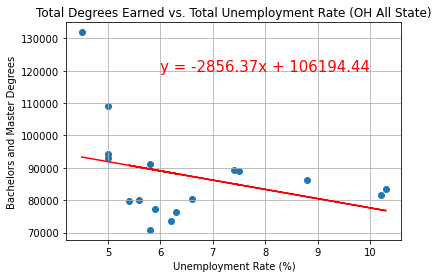

In [29]:

# Add the linear regression equation and line to plot
x_values = oh_only.iloc[:, 0]
y_values = degs_yr.iloc[:,0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,120000),fontsize=15,color="red")
plt.title("Total Degrees Earned vs. Total Unemployment Rate (OH All State)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Bachelors and Master Degrees")
print(f"The correlation coefficient between total degress and total unemployement is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.grid()
plt.show()



In [30]:
# pulling data needed for OH poverty to degree comparison 

oh_pov = df2[df2["State and County"] == "Ohio"]
# oh_pov.sort_index(ascending=True)
oh_pov = oh_pov.drop(columns = ["Median Household Income", "State and County"])
oh_pov

,Year,Poverty Percentage
1,2002,10.2
91,2003,10.7
181,2004,11.7
271,2005,13.0
361,2006,13.2
451,2007,13.1
541,2008,13.3
631,2009,15.1
721,2010,15.8
811,2011,16.3


The correlation coefficient between total degress and total poverty rate is 0.36


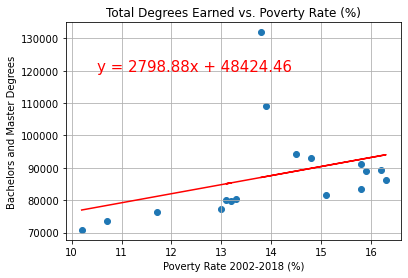

In [31]:
# scatter plot for total degrees earned vs poverty rate 

x_values = oh_pov.iloc[:, 1]
y_values = degs_yr.iloc[:,0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.5,120000),fontsize=15,color="red")
plt.title("Total Degrees Earned vs. Poverty Rate (%)")
plt.xlabel("Poverty Rate 2002-2018 (%)")
plt.ylabel("Bachelors and Master Degrees")
print(f"The correlation coefficient between total degress and total poverty rate is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.grid()
plt.show()

In [32]:
#grabbing data needed for total degrees earned vs median income scatter plot 

oh_med = df2[df2["State and County"]== "Ohio"]
oh_med = oh_med.drop(columns=["State and County", "Poverty Percentage"])
oh_med.head()

,Year,Median Household Income
1,2002,42246
91,2003,43119
181,2004,43371
271,2005,43547
361,2006,44609


The correlation coefficient between total degress and Median Household Income is 0.92


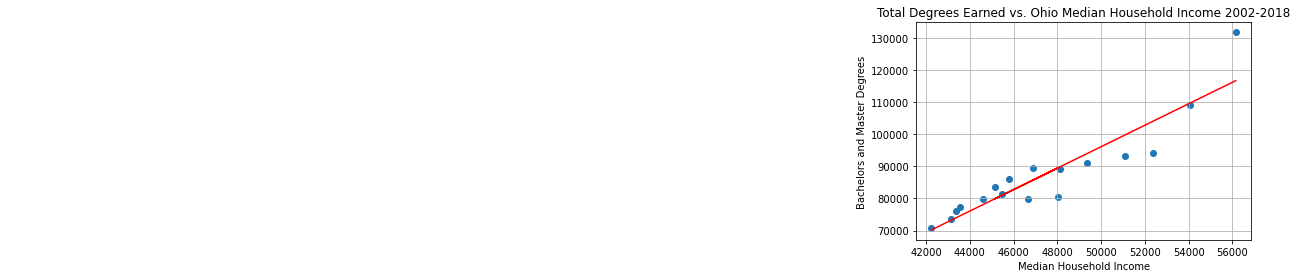

In [33]:
x_values = oh_med.iloc[:,1]
y_values = degs_yr.iloc[:,0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.5,120000),fontsize=15,color="red")
plt.title("Total Degrees Earned vs. Ohio Median Household Income 2002-2018")
plt.xlabel("Median Household Income")
plt.ylabel("Bachelors and Master Degrees")
print(f"The correlation coefficient between total degress and Median Household Income is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.grid()
plt.show()

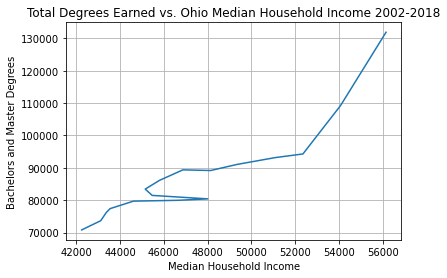

In [34]:
#line plot for degrees vs median income 

x_values = oh_med.iloc[:,1]
y_values = degs_yr.iloc[:,0]
plt.plot (x_values, y_values)
plt.title("Total Degrees Earned vs. Ohio Median Household Income 2002-2018")
plt.xlabel("Median Household Income")
plt.ylabel("Bachelors and Master Degrees")
plt.grid()
plt.show()



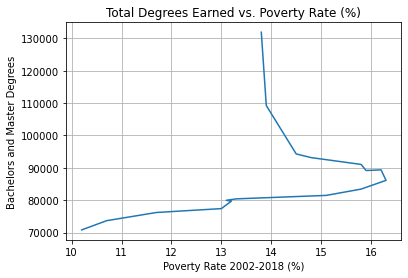

In [35]:
#line plot for degrees vs poverty rate 
x_values = oh_pov.iloc[:, 1]
y_values = degs_yr.iloc[:,0]
plt.plot(x_values, y_values)
plt.title("Total Degrees Earned vs. Poverty Rate (%)")
plt.xlabel("Poverty Rate 2002-2018 (%)")
plt.ylabel("Bachelors and Master Degrees")
plt.grid()
plt.show()



In [36]:
#line graph for unemployment 
unemploy_year = df3.transpose()
unemploy_year.reset_index(inplace=True)
unemploy_year = unemploy_year[["index", 1]]

unemploy_year = unemploy_year.rename(columns = {"index": "Year", 1: "Unemployment Percentage"})
# unemploy_year = unemploy_year.rename(={'2002 Unemployment Percent':'2002', '2003 Unemployment Percent':'2003','2004 Unemployment Percent':'2004',
# '2005 Unemployment Percent':'2005', '2006 Unemployment Percent':'2006','2007 Unemployment Percent':'2007',
# '2008 Unemployment Percent':'2008', '2009 Unemployment Percent':'2009','2010 Unemployment Percent':'2010',
# '2011 Unemployment Percent':'2011', '2012 Unemployment Percent':'2012','2013 Unemployment Percent':'2013',
# '2014 Unemployment Percent':'2014', '2015 Unemployment Percent':'2015','2016 Unemployment Percent':'2016',
# '2017 Unemployment Percent':'2017', '2018 Unemployment Percent':'2018'})

# unemploy_year["Year"] = unemploy_year["Year"].str[:4]
unemploy_year

,Year,Unemployment Percentage
0,State,OH
1,County,Ohio
2,2002 Unemployment Percent,5.8
3,2003 Unemployment Percent,6.2
4,2004 Unemployment Percent,6.3
5,2005 Unemployment Percent,5.9
6,2006 Unemployment Percent,5.4
7,2007 Unemployment Percent,5.6
8,2008 Unemployment Percent,6.6
9,2009 Unemployment Percent,10.2


In [37]:
unemploy_year["Year"] = unemploy_year["Year"].str[:4]
unemploy_year.drop([0, 1,19], axis=0, inplace=True)
unemploy_year

,Year,Unemployment Percentage
2,2002,5.8
3,2003,6.2
4,2004,6.3
5,2005,5.9
6,2006,5.4
7,2007,5.6
8,2008,6.6
9,2009,10.2
10,2010,10.3
11,2011,8.8


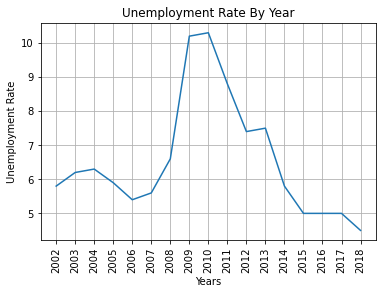

In [42]:
x = unemploy_year["Year"]
y = unemploy_year["Unemployment Percentage"]

plt.plot(x,y)
plt.xticks(rotation = 90)
plt.xlabel("Years")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate By Year")
plt.grid()
plt.show()

In [39]:
#adding a new plot to show the ohio total degrees by year
# will create the x/y data sets from the deg_yr data
# degs_yr
oh_degs_yr = pd.DataFrame(degs_yr)
oh_degs_yr.reset_index(inplace=True)
oh_degs_yr = oh_degs_yr.rename(columns = {"index": "Year"})
oh_degs_yr

,Year,Total
0,2002,70826
1,2003,73678
2,2004,76210
3,2005,77404
4,2006,79708
5,2007,79971
6,2008,80415
7,2009,81484
8,2010,83430
9,2011,86128


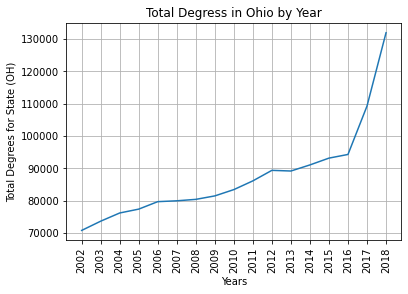

In [45]:
# create plot for year and degree
x = oh_degs_yr["Year"]
y = oh_degs_yr["Total"]
plt.plot(x,y)
plt.xticks(x,rotation = 90)
plt.xlabel("Years")
plt.ylabel("Total Degrees for State (OH)")
plt.title("Total Degress in Ohio by Year")
plt.grid()
plt.show()

In [47]:
#trying to add two y axis 
x = oh_degs_yr["Year"]
y1 = oh_degs_yr["Total"]
y2 = unemploy_year["Unemployment Percentage"]




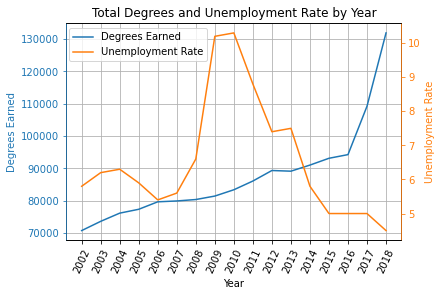

In [149]:
#color each axis
fig, ax1 = plt.subplots()

ax1.plot(x,y1)
ax1.set_ylabel('Degrees Earned', color='C0')
ax1.tick_params(axis='y', color='C0', labelcolor='C0')
ax1.set_xticks(x)
ax1.tick_params(axis='x', rotation=65)
ax1.set_xlabel('Year')
ax1.grid()

ax1.set_title('Total Degrees and Unemployment Rate by Year')

ax2 = ax1.twinx()
ax2.plot(x,y2,'C1')
ax2.set_ylabel('Unemployment Rate', color='C1')
ax2.tick_params(axis='y', color='C1', labelcolor='C1')
ax2.spines['right'].set_color('C1')
ax2.spines['left'].set_color('C0')
fig.legend(['Degrees Earned','Unemployment Rate'], bbox_to_anchor=(0.463, 0.88))
plt.savefig("Resources\TotalDegreesandUnemp-overtime.png")

plt.show()